In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
titanic_train = pd.read_csv(r"E:\project\tiatnic\train.csv")

In [70]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
titanic_train.shape

(891, 12)

In [72]:
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

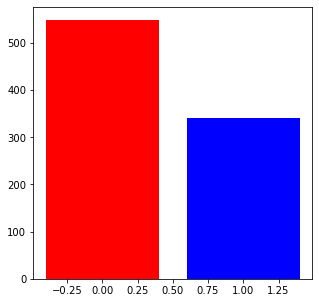

In [73]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()), color =['r', 'b'])
plt.show()

In [74]:
titanic_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

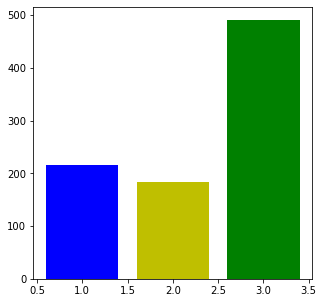

In [75]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Pclass'].value_counts().keys()),list(titanic_train['Pclass'].value_counts()), color=['g','b','y'])
plt.show()

In [76]:
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

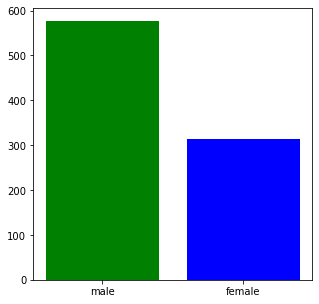

In [77]:
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Sex'].value_counts().keys()),list(titanic_train['Sex'].value_counts()), color=['g','b','y'])
plt.show()

C:\Users\sai\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sai\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


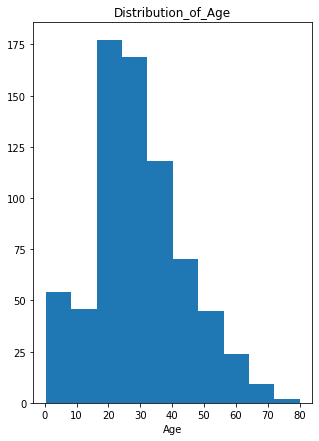

In [78]:
plt.figure(figsize=(5,7))
plt.hist(titanic_train['Age'])
plt.title('Distribution_of_Age')
plt.xlabel("Age")
plt.show()


In [79]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

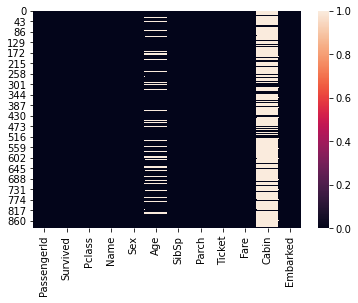

In [80]:
sns.heatmap(titanic_train.isnull())

In [81]:
titanic_train = titanic_train.fillna(titanic_train['Age'].mean())

In [82]:
titanic_train = titanic_train.fillna(titanic_train['Embarked'].mode())

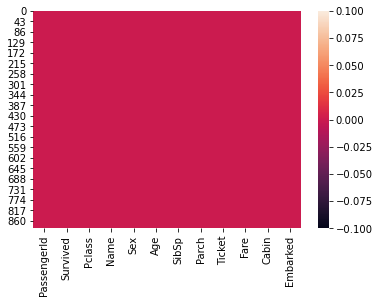

In [83]:
sns.heatmap(titanic_train.isnull())

In [84]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,29.6991,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,29.6991,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,29.6991,S


In [85]:
titanic_train=titanic_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis=1)

In [86]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [87]:
Sex1 = pd.get_dummies(titanic_train.Sex)

In [88]:
titanic_train = pd.concat([titanic_train, Sex1], axis='columns')

In [89]:
titanic_train.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


In [90]:
titanic_train = titanic_train.drop(['Sex'], axis=1)

In [91]:
titanic_train.head()

,Survived,Pclass,Age,Fare,female,male
0,0,3,22.0,7.2500,0,1
1,1,1,38.0,71.2833,1,0
2,1,3,26.0,7.9250,1,0
3,1,1,35.0,53.1000,1,0
4,0,3,35.0,8.0500,0,1


In [92]:
from sklearn.preprocessing import StandardScaler
sts = StandardScaler()


In [93]:
feature_scale =['Age', 'Fare']
titanic_train[feature_scale] = sts.fit_transform(titanic_train[feature_scale])

In [94]:
titanic_train.head()

,Survived,Pclass,Age,Fare,female,male
0,0,3,-0.592481,-0.502445,0,1
1,1,1,0.638789,0.786845,1,0
2,1,3,-0.284663,-0.488854,1,0
3,1,1,0.407926,0.420730,1,0
4,0,3,0.407926,-0.486337,0,1


In [95]:
titanic_train.describe()

,Survived,Pclass,Age,Fare,female,male
count,891.000000,891.000000,8.910000e+02,8.910000e+02,891.000000,891.000000
mean,0.383838,2.308642,2.562796e-16,-4.373606e-17,0.352413,0.647587
std,0.486592,0.836071,1.000562e+00,1.000562e+00,0.477990,0.477990
min,0.000000,1.000000,-2.253155e+00,-6.484217e-01,0.000000,0.000000
25%,0.000000,2.000000,-5.924806e-01,-4.891482e-01,0.000000,0.000000
50%,0.000000,3.000000,0.000000e+00,-3.573909e-01,0.000000,1.000000
75%,1.000000,3.000000,4.079260e-01,-2.424635e-02,1.000000,1.000000
max,1.000000,3.000000,3.870872e+00,9.667167e+00,1.000000,1.000000


In [96]:
X = titanic_train.drop(['Survived'], axis=1)
Y = titanic_train['Survived']

# Modle Building

In [97]:
# importing Classifier modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np


In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [99]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf,X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.83146067 0.7752809  0.79775281 0.80898876 0.80898876
 0.78651685 0.80898876 0.78651685 0.78651685]


In [100]:
#KNN score
round(np.mean(score)*100, 2)

79.58

In [101]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.76404494 0.82022472 0.7752809  0.80898876 0.76404494
 0.75280899 0.80898876 0.78651685 0.76404494]


In [102]:
#decision tree Score
round(np.mean(score)*100, 2)

78.12

In [103]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.83146067 0.85393258 0.78651685 0.86516854 0.80898876
 0.79775281 0.80898876 0.80898876 0.82022472]


In [104]:
round(np.mean(score)*100, 2)

82.04

In [105]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.78651685 0.7752809  0.74157303 0.76404494 0.78651685
 0.78651685 0.79775281 0.79775281 0.79775281]


In [106]:
round(np.mean(score)*100, 2)

78.11

In [107]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, Y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78888889 0.78651685 0.78651685 0.76404494 0.80898876 0.80898876
 0.80898876 0.79775281 0.82022472 0.75280899]


In [108]:
round(np.mean(score)*100, 2)

79.24

In [109]:
titanic_test= pd.read_csv(r"E:\project\tiatnic\test.csv")

In [110]:
pd.options.display.max_rows
pd.options.display.max_columns

20

In [111]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [112]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
